In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [72]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [74]:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

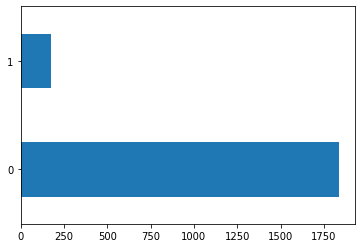

In [75]:
df["bad"].value_counts().plot.barh();

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [77]:
y = df["bad"]
X = df.drop(["bad"], axis=1)

In [78]:
dummy_data = pd.get_dummies(data[["job","reason"]])

In [79]:
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

In [80]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [81]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        08:45:20   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""


# scikit-learn

In [82]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
loj_model.intercept_

array([-0.00256361])

In [84]:
loj_model.coef_

array([[-3.45744369e-05, -6.99561375e-06, -1.60344396e-06,
        -1.76926822e-02,  6.56856812e-03,  1.17615246e-02,
        -8.77179764e-03,  4.17663965e-03, -1.69201255e-02,
         2.71202775e-02]])

### Tahmin & Model Tuning

In [85]:
y_pred = loj_model.predict(X)

In [86]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [87]:
accuracy_score(y, y_pred)

0.9093161546085233

In [88]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [89]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.93791535, 0.06208465],
       [0.81229489, 0.18770511],
       [0.98697812, 0.01302188],
       [0.83476237, 0.16523763],
       [0.82000557, 0.17999443],
       [0.98423197, 0.01576803],
       [0.85334995, 0.14665005],
       [0.96480699, 0.03519301],
       [0.75102422, 0.24897578],
       [0.96060046, 0.03939954]])

In [91]:
y[0:10]

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [92]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [93]:
y_probs[0:10]

array([0.06208465, 0.18770511, 0.01302188, 0.16523763, 0.17999443,
       0.01576803, 0.14665005, 0.03519301, 0.24897578, 0.03939954])

In [94]:
y_pred = [1 if i > 0.16 else 0 for i in y_probs]

In [95]:
y_pred[0:10]

[0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

In [96]:
confusion_matrix(y, y_pred)

array([[1494,  346],
       [  94,   84]], dtype=int64)

In [97]:
accuracy_score(y, y_pred)

0.7819623389494549

In [98]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1840
           1       0.20      0.47      0.28       178

    accuracy                           0.78      2018
   macro avg       0.57      0.64      0.57      2018
weighted avg       0.88      0.78      0.82      2018



In [99]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.06208465, 0.18770511, 0.01302188, 0.16523763, 0.17999443])

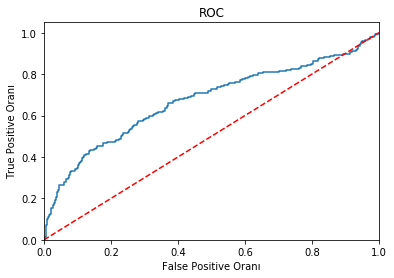

In [100]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [101]:
logit_roc_auc

0.4986413043478261

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)


In [103]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9133663366336634

In [105]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9158536585365855

## Gaussian Naive Bayes

In [106]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [110]:
nb_model.predict_proba(X_test)[0:10]

array([[0.98928136, 0.01071864],
       [0.9597811 , 0.0402189 ],
       [0.98780831, 0.01219169],
       [0.98648937, 0.01351063],
       [0.99486944, 0.00513056],
       [0.97528611, 0.02471389],
       [0.98631831, 0.01368169],
       [0.97593666, 0.02406334],
       [0.4379753 , 0.5620247 ],
       [0.99478556, 0.00521444]])

In [111]:
y_pred = nb_model.predict(X_test)

In [112]:
accuracy_score(y_test, y_pred)

0.8960396039603961

In [113]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9232926829268292

## KNN

### Model & Tahmin

In [114]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [115]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
y_pred = knn_model.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.9158415841584159

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

    accuracy                           0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



## MODEL TUNING

In [119]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [120]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:

print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9132620197837589
En iyi parametreler: {'n_neighbors': 17}


In [122]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [123]:
knn_tuned.score(X_test, y_test)

0.9183168316831684

In [124]:
y_pred = knn_tuned.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.9183168316831684

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.06      0.11        35

    accuracy                           0.92       404
   macro avg       0.96      0.53      0.53       404
weighted avg       0.93      0.92      0.88       404



# Yapay Sinir Ağları

### Model & Tahmin

In [127]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
X_test_scaled[0:5]

array([[ 0.68941255,  0.43085191,  0.47278238, -1.19625189,  1.56477931,
        -0.33077825,  0.08497539,  0.54812556,  1.54776915,  0.12368953],
       [ 0.22402982,  0.78514133,  1.32140428, -0.40593238, -0.27466265,
        -0.33077825,  0.38291777,  1.7509463 ,  0.1817688 ,  1.05157074],
       [-0.17747685,  1.07182394,  0.99841583, -0.66937222, -0.27466265,
        -0.33077825, -0.28762812, -0.65469518, -0.13346205, -0.98016717],
       [-0.25047806, -1.2014695 ,  1.08722937, -0.01077263, -0.27466265,
        -0.33077825,  1.45637631, -0.65469518,  0.49699965, -0.76576556],
       [-1.08086685,  0.51487143,  0.17545567,  1.70158629, -0.27466265,
        -0.33077825, -0.72412658, -0.65469518, -1.18423155,  0.40640423]])

In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [134]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9455445544554455


# Model Tuning

In [135]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [137]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [138]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [139]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


In [140]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [141]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [142]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9554455445544554

# CART

### Model & Tahmin

In [143]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [146]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
!pip install skompiler

In [148]:
from skompiler import skompile

In [149]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36633.0 else 1 if x[3] <= 6.5 else 0) if x[9] <= 
    32.76449966430664 else 0 if x[3] <= 1.5 else 1) if x[0] <= 9050.0 else 
    ((((0 if x[4] <= 0.5 else 0 if x[2] <= 32716.5 else 1) if x[2] <= 
    45602.0 else 0 if x[6] <= 81.6150016784668 else 1) if x[0] <= 12750.0 else
    0) if x[6] <= 324.5449981689453 else 1) if x[4] <= 3.5 else 1) if x[2] <=
    48600.0 else (1 if x[9] <= 37.44599914550781 else 0) if x[6] <= 
    43.650001525878906 else ((1 if x[8] <= 1.5 else (((1 if x[3] <= 4.0 else
    (0 if x[9] <= 36.76350021362305 else 1) if x[1] <= 45320.5 else 0) if x
    [6] <= 60.404998779296875 else ((((1 if x[1] <= 65688.0 else 0) if x[3] <=
    2.5 else 0) if x[2] <= 121579.0 else 1 if x[3] <= 7.0 else 0) if x[4] <=
    0.5 else 1 if x[6] <= 160.40499877929688 else 0) if x[0] <= 6950.0 else
    ((((1 if x[2] <= 51370.5 else ((1 if x[3] <= 14.5 else 0) if x[9] <= 
    33.51150035858154 else 0) if x[1] <= 38380.5 else 0 if x[3] <= 8.5 else
    (0 if x[1] <= 54188

In [150]:
x = [9]

In [151]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [152]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.943069306930693

## Model Tuning

In [153]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [155]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    8.5s finished


In [156]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 9, 'min_samples_split': 2}


## final

In [157]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 22)
cart_tuned = cart.fit(X_train, y_train)

In [158]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9381188118811881

# Random Forests

In [159]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [162]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

### Model Tuning

In [164]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [166]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [167]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [168]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 10}


## final

In [169]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [170]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.948019801980198

In [171]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

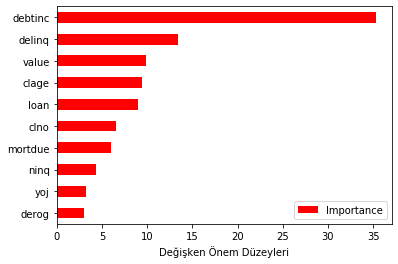

In [172]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# GBM

In [173]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [176]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

## MODEL TUNING

In [177]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [178]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [179]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [180]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [181]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [182]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [183]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [184]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

# XGBoost

In [185]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [186]:
!pip install xgboost

In [187]:
from xgboost import XGBClassifier

In [188]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [189]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9603960396039604

## Model Tuning

In [191]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [193]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [194]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 27.3min finished


[09:36:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [195]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.8}

In [196]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 1000,
                    subsample = 0.8)

In [197]:
xgb_tuned =  xgb.fit(X_train,y_train)

[09:36:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [198]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9579207920792079

## LightGBM

In [199]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [200]:
from lightgbm import LGBMClassifier

In [201]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [202]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9603960396039604

### Model Tuning

In [203]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [204]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [205]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [206]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2001 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3297 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4917 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 11.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [207]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 10,
 'n_estimators': 2000,
 'subsample': 0.6}

In [208]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 10)

In [209]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [210]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

## CatBoost

## Model & Tahmin

In [211]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [212]:
from catboost import CatBoostClassifier

In [213]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.012639
0:	learn: 0.6783924	total: 551ms	remaining: 9m 10s
1:	learn: 0.6637349	total: 557ms	remaining: 4m 38s
2:	learn: 0.6493370	total: 560ms	remaining: 3m 5s
3:	learn: 0.6364432	total: 562ms	remaining: 2m 19s
4:	learn: 0.6229083	total: 565ms	remaining: 1m 52s
5:	learn: 0.6101687	total: 568ms	remaining: 1m 34s
6:	learn: 0.5980989	total: 570ms	remaining: 1m 20s
7:	learn: 0.5860459	total: 573ms	remaining: 1m 11s
8:	learn: 0.5744877	total: 576ms	remaining: 1m 3s
9:	learn: 0.5634189	total: 579ms	remaining: 57.3s
10:	learn: 0.5524676	total: 581ms	remaining: 52.3s
11:	learn: 0.5418449	total: 584ms	remaining: 48.1s
12:	learn: 0.5311100	total: 586ms	remaining: 44.5s
13:	learn: 0.5216870	total: 589ms	remaining: 41.4s
14:	learn: 0.5137869	total: 591ms	remaining: 38.8s
15:	learn: 0.5043756	total: 593ms	remaining: 36.5s
16:	learn: 0.4964503	total: 595ms	remaining: 34.4s
17:	learn: 0.4875034	total: 598ms	remaining: 32.6s
18:	learn: 0.4779101	total: 601ms	remaining: 31s
19:	le

176:	learn: 0.1701394	total: 988ms	remaining: 4.59s
177:	learn: 0.1697857	total: 990ms	remaining: 4.57s
178:	learn: 0.1694117	total: 993ms	remaining: 4.55s
179:	learn: 0.1689634	total: 995ms	remaining: 4.53s
180:	learn: 0.1684034	total: 997ms	remaining: 4.51s
181:	learn: 0.1681081	total: 1s	remaining: 4.5s
182:	learn: 0.1676114	total: 1s	remaining: 4.48s
183:	learn: 0.1671490	total: 1s	remaining: 4.46s
184:	learn: 0.1668260	total: 1.01s	remaining: 4.44s
185:	learn: 0.1663317	total: 1.01s	remaining: 4.42s
186:	learn: 0.1659519	total: 1.01s	remaining: 4.4s
187:	learn: 0.1655450	total: 1.01s	remaining: 4.38s
188:	learn: 0.1652396	total: 1.02s	remaining: 4.36s
189:	learn: 0.1649421	total: 1.02s	remaining: 4.34s
190:	learn: 0.1646333	total: 1.02s	remaining: 4.33s
191:	learn: 0.1642375	total: 1.02s	remaining: 4.31s
192:	learn: 0.1637450	total: 1.03s	remaining: 4.29s
193:	learn: 0.1633821	total: 1.03s	remaining: 4.27s
194:	learn: 0.1632687	total: 1.03s	remaining: 4.25s
195:	learn: 0.1630063	t

378:	learn: 0.1241925	total: 1.48s	remaining: 2.43s
379:	learn: 0.1239577	total: 1.48s	remaining: 2.42s
380:	learn: 0.1237353	total: 1.49s	remaining: 2.42s
381:	learn: 0.1236391	total: 1.49s	remaining: 2.41s
382:	learn: 0.1234227	total: 1.49s	remaining: 2.4s
383:	learn: 0.1231221	total: 1.5s	remaining: 2.4s
384:	learn: 0.1229497	total: 1.5s	remaining: 2.4s
385:	learn: 0.1227984	total: 1.5s	remaining: 2.39s
386:	learn: 0.1227033	total: 1.5s	remaining: 2.38s
387:	learn: 0.1225918	total: 1.51s	remaining: 2.38s
388:	learn: 0.1223770	total: 1.51s	remaining: 2.37s
389:	learn: 0.1221544	total: 1.51s	remaining: 2.37s
390:	learn: 0.1219868	total: 1.52s	remaining: 2.36s
391:	learn: 0.1217252	total: 1.52s	remaining: 2.36s
392:	learn: 0.1215450	total: 1.52s	remaining: 2.35s
393:	learn: 0.1213558	total: 1.52s	remaining: 2.35s
394:	learn: 0.1212368	total: 1.53s	remaining: 2.34s
395:	learn: 0.1211108	total: 1.53s	remaining: 2.33s
396:	learn: 0.1208629	total: 1.53s	remaining: 2.33s
397:	learn: 0.12075

577:	learn: 0.0959049	total: 1.97s	remaining: 1.44s
578:	learn: 0.0958217	total: 1.98s	remaining: 1.44s
579:	learn: 0.0957358	total: 1.98s	remaining: 1.43s
580:	learn: 0.0956385	total: 1.98s	remaining: 1.43s
581:	learn: 0.0954989	total: 1.98s	remaining: 1.43s
582:	learn: 0.0952493	total: 1.99s	remaining: 1.42s
583:	learn: 0.0951715	total: 1.99s	remaining: 1.42s
584:	learn: 0.0951040	total: 1.99s	remaining: 1.41s
585:	learn: 0.0949747	total: 1.99s	remaining: 1.41s
586:	learn: 0.0948656	total: 2s	remaining: 1.4s
587:	learn: 0.0947585	total: 2s	remaining: 1.4s
588:	learn: 0.0945822	total: 2s	remaining: 1.4s
589:	learn: 0.0945464	total: 2s	remaining: 1.39s
590:	learn: 0.0945005	total: 2s	remaining: 1.39s
591:	learn: 0.0943301	total: 2.01s	remaining: 1.38s
592:	learn: 0.0942652	total: 2.01s	remaining: 1.38s
593:	learn: 0.0941896	total: 2.01s	remaining: 1.37s
594:	learn: 0.0940753	total: 2.01s	remaining: 1.37s
595:	learn: 0.0939822	total: 2.02s	remaining: 1.37s
596:	learn: 0.0938889	total: 2

794:	learn: 0.0753801	total: 2.48s	remaining: 639ms
795:	learn: 0.0752550	total: 2.48s	remaining: 636ms
796:	learn: 0.0751261	total: 2.48s	remaining: 632ms
797:	learn: 0.0750589	total: 2.48s	remaining: 629ms
798:	learn: 0.0750023	total: 2.49s	remaining: 626ms
799:	learn: 0.0748265	total: 2.49s	remaining: 622ms
800:	learn: 0.0747356	total: 2.49s	remaining: 619ms
801:	learn: 0.0746002	total: 2.49s	remaining: 616ms
802:	learn: 0.0745310	total: 2.5s	remaining: 612ms
803:	learn: 0.0744984	total: 2.5s	remaining: 609ms
804:	learn: 0.0743941	total: 2.5s	remaining: 606ms
805:	learn: 0.0743182	total: 2.5s	remaining: 603ms
806:	learn: 0.0743104	total: 2.5s	remaining: 599ms
807:	learn: 0.0742657	total: 2.51s	remaining: 596ms
808:	learn: 0.0740650	total: 2.51s	remaining: 593ms
809:	learn: 0.0740189	total: 2.51s	remaining: 589ms
810:	learn: 0.0739615	total: 2.51s	remaining: 586ms
811:	learn: 0.0738243	total: 2.52s	remaining: 583ms
812:	learn: 0.0737229	total: 2.52s	remaining: 580ms
813:	learn: 0.073

In [214]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9554455445544554

## Model Tuning

In [215]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [216]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


0:	learn: 0.6365081	total: 3.23ms	remaining: 644ms
1:	learn: 0.5848591	total: 9.96ms	remaining: 987ms
2:	learn: 0.5345221	total: 15.6ms	remaining: 1.02s
3:	learn: 0.4914734	total: 21.2ms	remaining: 1.04s
4:	learn: 0.4543201	total: 27.3ms	remaining: 1.06s
5:	learn: 0.4230499	total: 33.3ms	remaining: 1.08s
6:	learn: 0.3953455	total: 38.7ms	remaining: 1.07s
7:	learn: 0.3701968	total: 44.4ms	remaining: 1.06s
8:	learn: 0.3495653	total: 49.9ms	remaining: 1.06s
9:	learn: 0.3309823	total: 55.4ms	remaining: 1.05s
10:	learn: 0.3132876	total: 60.9ms	remaining: 1.05s
11:	learn: 0.3011359	total: 63.4ms	remaining: 993ms
12:	learn: 0.2888061	total: 68ms	remaining: 978ms
13:	learn: 0.2757627	total: 72.3ms	remaining: 961ms
14:	learn: 0.2640045	total: 76.3ms	remaining: 941ms
15:	learn: 0.2547129	total: 80.5ms	remaining: 926ms
16:	learn: 0.2467544	total: 85.1ms	remaining: 916ms
17:	learn: 0.2387184	total: 89.7ms	remaining: 907ms
18:	learn: 0.2318158	total: 94ms	remaining: 895ms
19:	learn: 0.2267839	total

194:	learn: 0.0460125	total: 861ms	remaining: 22.1ms
195:	learn: 0.0457340	total: 866ms	remaining: 17.7ms
196:	learn: 0.0454476	total: 870ms	remaining: 13.3ms
197:	learn: 0.0452781	total: 875ms	remaining: 8.84ms
198:	learn: 0.0451544	total: 879ms	remaining: 4.42ms
199:	learn: 0.0448430	total: 884ms	remaining: 0us


{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [217]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [218]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6365081	total: 7.48ms	remaining: 1.49s
1:	learn: 0.5848591	total: 12.4ms	remaining: 1.23s
2:	learn: 0.5345221	total: 16.5ms	remaining: 1.09s
3:	learn: 0.4914734	total: 21.1ms	remaining: 1.03s
4:	learn: 0.4543201	total: 25.6ms	remaining: 997ms
5:	learn: 0.4230499	total: 30.1ms	remaining: 974ms
6:	learn: 0.3953455	total: 34.5ms	remaining: 952ms
7:	learn: 0.3701968	total: 38.9ms	remaining: 933ms
8:	learn: 0.3495653	total: 43.1ms	remaining: 915ms
9:	learn: 0.3309823	total: 47.5ms	remaining: 902ms
10:	learn: 0.3132876	total: 52.2ms	remaining: 897ms
11:	learn: 0.3011359	total: 54.4ms	remaining: 852ms
12:	learn: 0.2888061	total: 59.7ms	remaining: 859ms
13:	learn: 0.2757627	total: 64.4ms	remaining: 856ms
14:	learn: 0.2640045	total: 68.9ms	remaining: 849ms
15:	learn: 0.2547129	total: 74ms	remaining: 851ms
16:	learn: 0.2467544	total: 78.5ms	remaining: 845ms
17:	learn: 0.2387184	total: 82.9ms	remaining: 838ms
18:	learn: 0.2318158	total: 87.3ms	remaining: 832ms
19:	learn: 0.2267839	tot

197:	learn: 0.0452781	total: 868ms	remaining: 8.77ms
198:	learn: 0.0451544	total: 873ms	remaining: 4.38ms
199:	learn: 0.0448430	total: 877ms	remaining: 0us


In [219]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

# Tüm Modellerin Karşılaştırılması

In [220]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [221]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        09:49:28   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [222]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [223]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [224]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 22)
cart_tuned = cart.fit(X_train, y_train)

In [225]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train

SyntaxError: unexpected EOF while parsing (<ipython-input-225-bc60bf54e550>, line 6)

In [226]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [227]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6365081	total: 6.44ms	remaining: 1.28s
1:	learn: 0.5848591	total: 11.6ms	remaining: 1.15s
2:	learn: 0.5345221	total: 16.1ms	remaining: 1.06s
3:	learn: 0.4914734	total: 20.7ms	remaining: 1.01s
4:	learn: 0.4543201	total: 25.1ms	remaining: 981ms
5:	learn: 0.4230499	total: 29.8ms	remaining: 963ms
6:	learn: 0.3953455	total: 35.1ms	remaining: 968ms
7:	learn: 0.3701968	total: 39.9ms	remaining: 958ms
8:	learn: 0.3495653	total: 44.8ms	remaining: 950ms
9:	learn: 0.3309823	total: 49.6ms	remaining: 942ms
10:	learn: 0.3132876	total: 54ms	remaining: 927ms
11:	learn: 0.3011359	total: 56ms	remaining: 877ms
12:	learn: 0.2888061	total: 60.4ms	remaining: 868ms
13:	learn: 0.2757627	total: 65ms	remaining: 863ms
14:	learn: 0.2640045	total: 69.4ms	remaining: 856ms
15:	learn: 0.2547129	total: 74ms	remaining: 851ms
16:	learn: 0.2467544	total: 78.3ms	remaining: 843ms
17:	learn: 0.2387184	total: 82.8ms	remaining: 837ms
18:	learn: 0.2318158	total: 87.2ms	remaining: 831ms
19:	learn: 0.2267839	total: 90

195:	learn: 0.0457340	total: 872ms	remaining: 17.8ms
196:	learn: 0.0454476	total: 876ms	remaining: 13.3ms
197:	learn: 0.0452781	total: 881ms	remaining: 8.9ms
198:	learn: 0.0451544	total: 886ms	remaining: 4.45ms
199:	learn: 0.0448430	total: 890ms	remaining: 0us


In [228]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [229]:
xgb_tuned =  xgb.fit(X_train,y_train)

[09:55:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');